# Abstract

### Our project strives to look at how certain student habits, such as extracurricular hours and studying hours, might have an influence on GPA. By observing 4 data sets, each from different locations and/or subjects, we plan to find a correlation between certain habits and GPA. Our data sets explore data sets from India, Malaysia, and Portugal as a way to see if certain findings are universal.

# Data Used

### This data was obtained publicly from Kaggle. In this data, there are 8 variables and 2000 observations. This data is primarily from India, where 2000 students answered a survey through a google form. The data is a dataset of various lifestyle and academic habits/aspects of 2000 students. The data was collected from August 2023 to May 2024. There are not really any ethical concerns as there is no data that will connect any data to one person. The student ID column is simply an index column rather than an identification column. The data simply consists of inputs, such as numbers, which is not revealing of anything personal.

### https://www.kaggle.com/datasets/steve1215rogg/student-lifestyle-dataset/data

## India Data Set From Kaggle

In [32]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.io as pio
pio.renderers.defaule = 'colab'

from itables import show

pd.options.mode.chained_assignment = None 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Machine Learning Packages
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression 

# Exploratory Analysis

In [33]:
DF_india = pd.read_csv('student_lifestyle_dataset.csv')
DF_india

,Student_ID,Study_Hours_Per_Day,Extracurricular_Hours_Per_Day,Sleep_Hours_Per_Day,Social_Hours_Per_Day,Physical_Activity_Hours_Per_Day,GPA,Stress_Level
0,1,6.9,3.8,8.7,2.8,1.8,2.99,Moderate
1,2,5.3,3.5,8.0,4.2,3.0,2.75,Low
2,3,5.1,3.9,9.2,1.2,4.6,2.67,Low
3,4,6.5,2.1,7.2,1.7,6.5,2.88,Moderate
4,5,8.1,0.6,6.5,2.2,6.6,3.51,High
...,...,...,...,...,...,...,...,...
1995,1996,6.5,0.2,7.4,2.1,7.8,3.32,Moderate
1996,1997,6.3,2.8,8.8,1.5,4.6,2.65,Moderate
1997,1998,6.2,0.0,6.2,0.8,10.8,3.14,Moderate
1998,1999,8.1,0.7,7.6,3.5,4.1,3.04,High


In [34]:
DF_india.dtypes

Student_ID                           int64
Study_Hours_Per_Day                float64
Extracurricular_Hours_Per_Day      float64
Sleep_Hours_Per_Day                float64
Social_Hours_Per_Day               float64
Physical_Activity_Hours_Per_Day    float64
GPA                                float64
Stress_Level                        object
dtype: object

#### The 8 variables consist of: Student_ID is an integer, which serves more as an index number so it will not really be taken into account, Study_Hours_Per_Day, which is a float, which represents the amount of hours that a student spends studying per day, Extracurricular_Hours_Per_Day, Sleep_Hours_Per_Day, Physical_Activity_Hours_Per_Day, and GPA are all floats and they are exactly what they say which is the amount of hours that a student does the corresponding activity per day, Social_Hours_Per_Day is a float and it represents how much times a student spends socializing per day, and Stress_Level is an object and it is a self report of a students stress level which can be reported as Low, Moderate, and High.

In [35]:
show(DF_india["Stress_Level"].value_counts())

Loading ITables v2.5.2 from the internet... (need help?)


#### An initial analysis shows that most of the data points show that most of the students in the set have high levels of stress. This could possibly introduce some skewing.

In [36]:
show(DF_india["Extracurricular_Hours_Per_Day"].value_counts())

Loading ITables v2.5.2 from the internet... (need help?)


#### This analysis shows that most of the students do around 1.6 hours of extracurricular hours per day. 

In [37]:
show(DF_india["Study_Hours_Per_Day"].value_counts())

Loading ITables v2.5.2 from the internet... (need help?)


#### Most students study around 6.3 hours per day which seems a bit high.

In [38]:
show(DF_india["Social_Hours_Per_Day"].value_counts())

Loading ITables v2.5.2 from the internet... (need help?)


#### This analysis shows that most students are social for around 0.3 hours a day.

In [39]:
show(DF_india["Physical_Activity_Hours_Per_Day"].value_counts())

Loading ITables v2.5.2 from the internet... (need help?)


#### This analysis shows how most people do physical activity for around 4 hours per day.

# Analysis

In [40]:
DF_india.rename(columns = {'Study_Hours_Per_Day':'Study Hours','Extracurricular_Hours_Per_Day':'Extracurricular Hours',
                    'Sleep_Hours_Per_Day':'Sleep Hours','Social_Hours_Per_Day':'Social Hours',
                    'Physical_Activity_Hours_Per_Day':'Physical Activity Hours','Stress_Level':'Stress Level',
                    'Student_ID':'Student ID'},inplace = True)
show(DF_india)

Loading ITables v2.5.2 from the internet... (need help?)


In [41]:
DF_india.dtypes

Student ID                   int64
Study Hours                float64
Extracurricular Hours      float64
Sleep Hours                float64
Social Hours               float64
Physical Activity Hours    float64
GPA                        float64
Stress Level                object
dtype: object

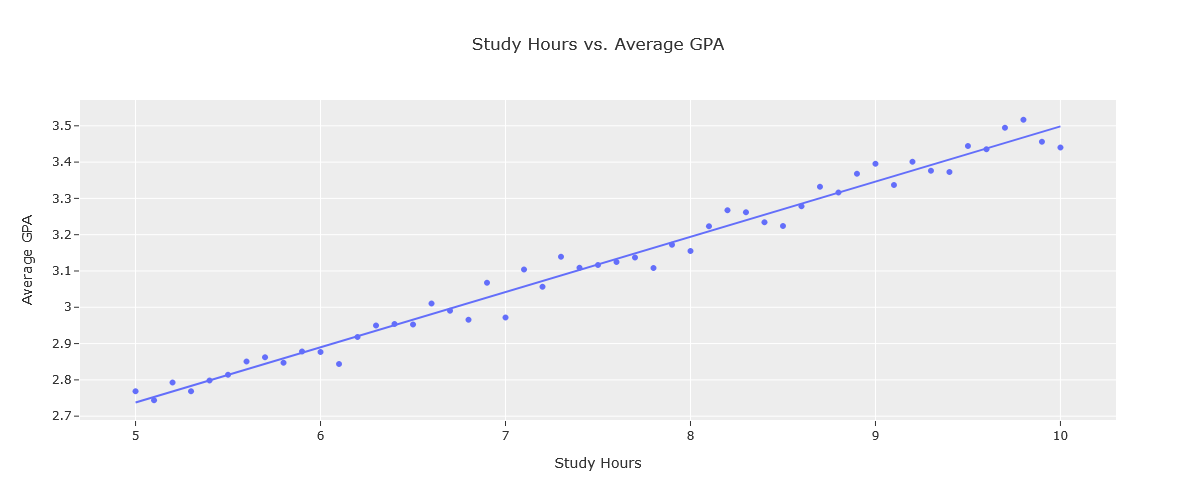

In [42]:
DF_study = DF_india.groupby('Study Hours')['GPA'].mean().reset_index()
DF_study

fig_study = px.scatter(DF_study, x = 'Study Hours', y = 'GPA',
                  title = 'Study Hours vs. Average GPA',
                      trendline = 'ols')
fig_study.update_layout(bargap=0.02,
                  yaxis_title = 'Average GPA',
                   autosize=False,
                   width=1000,
                   height=500,
                  template="ggplot2"
                       )
fig_study.show()

### Based on this scatter plot, there is a big positive correlation between Sleep Hours and average GPA. The line of fit has a great R^2 score of 0.981, meaning that over 98 percent of the variance can be predicted/explained by the linear fit. As a result, this graph shows how the more you study, the more likely your GPA is to be.
### This logically does make sense. The more that one studies, the better the overall grades that one will get.

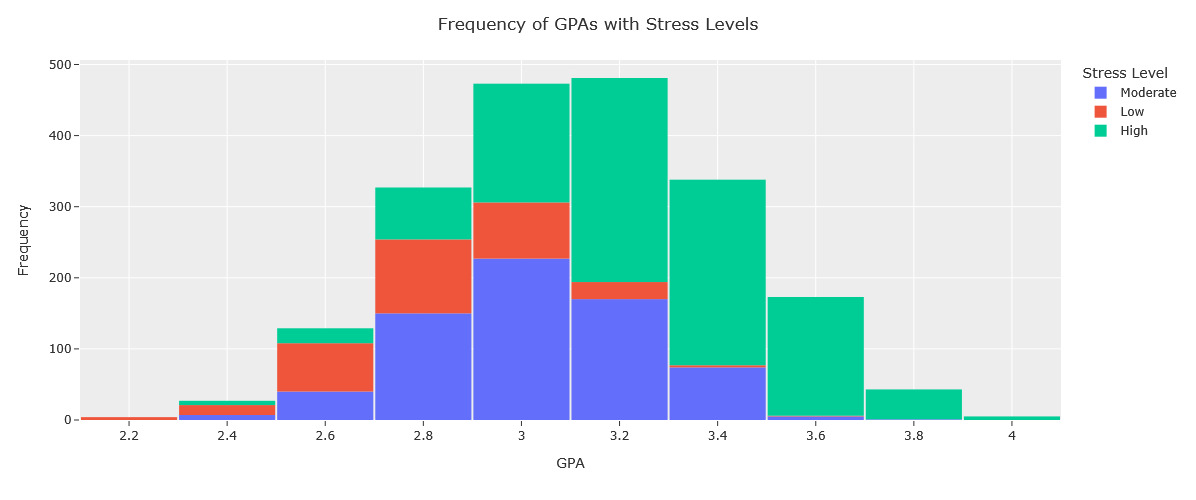

In [43]:
fig_gpafreq = px.histogram(DF_india, x = 'GPA', nbins = 12, color = 'Stress Level')
fig_gpafreq.update_layout(bargap=0.02,
                  title='Frequency of GPAs with Stress Levels',
                  title_x=0.5,
                  yaxis_title="Frequency",
                  xaxis_title="GPA",
                  autosize=False,
                  width=800,
                  height=500,
                  template="ggplot2")
fig_gpafreq.show()

### Furthermore, we also observed if a GPA had some sort of relation with stress level. Plotting the frequency of GPA and coloring the histogram by stress level, we can see that as GPA increases, the stress level increases. So, as GPA gets higher, there is a drawback as one is most likely to get more stressed.

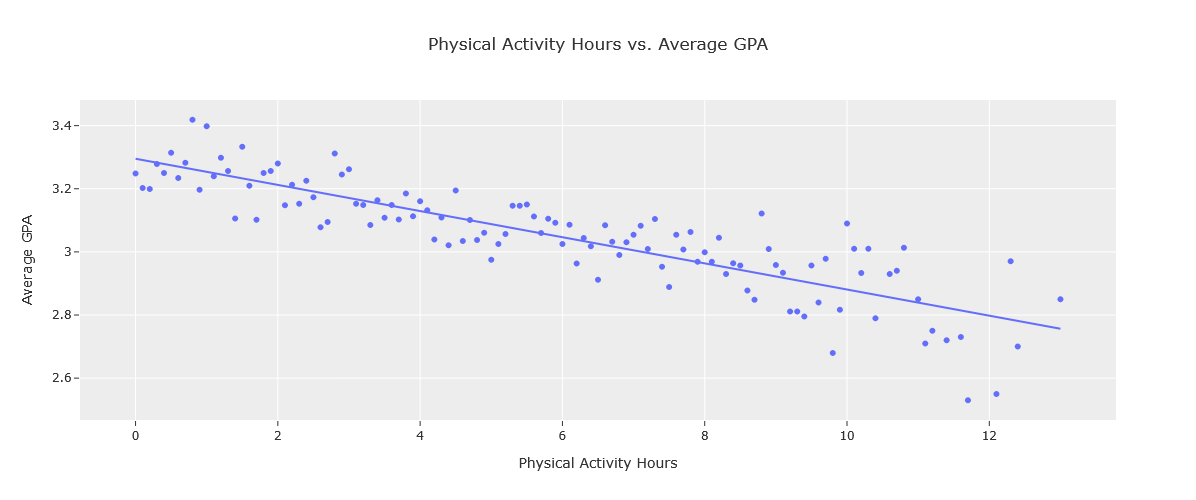

In [44]:
DF_physicalin = DF_india.groupby('Physical Activity Hours')['GPA'].mean().reset_index()
DF_physicalin

fig_physicalin = px.scatter(DF_physicalin, x = 'Physical Activity Hours', y = 'GPA',
                  title = 'Physical Activity Hours vs. Average GPA',
                         trendline = 'ols')
fig_physicalin.update_layout(bargap=0.02,
                  yaxis_title = 'Average GPA',
                   autosize=False,
                   width=1000,
                   height=500,
                  template="ggplot2"
                       )
fig_physicalin.show()

### Based on the scatter plot and the trendline, the amount of physical hours a student performs does have some sort of negative correlation with GPA. Using the mean GPA, we graphed the GPA against Physical activity hours and plotted a trendline. The score of the trendline is 0.741, meaning that the linear fit accounts for around 74 percent of the data points. 

### Based on this, one could say that there is some sort of correlation between physical activity hours and GPA. As your GPA gets higher, the less time you have for physical activity.

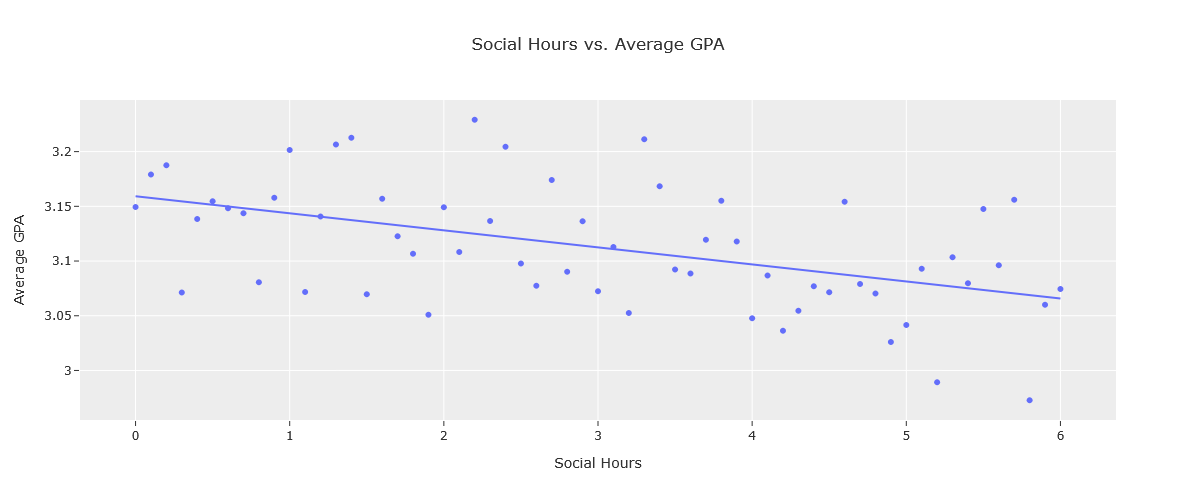

In [45]:
DF_socialin = DF_india.groupby('Social Hours')['GPA'].mean().reset_index()
DF_socialin

fig_socialin = px.scatter(DF_socialin, x = 'Social Hours', y = 'GPA',
                  title = 'Social Hours vs. Average GPA',
                       trendline = 'ols')
fig_socialin.update_layout(bargap=0.02,
                  yaxis_title = 'Average GPA',
                   autosize=False,
                   width=1000,
                   height=500,
                  template="ggplot2"
                       )
fig_socialin.show()

### Based on this scatter plot, there is hardly any correlation between how many hours a student socializes and GPA. The trendline shows how dispersed the data points are from it, and the trendline's values confirm that. The line's score is 0.245, meaning it accounts for only about 24% of the data points. Overall, there is not much correlation. 

### Some aspects of this graph would make sense, as the negative correlation suggests that one would have less time to socialize with others, as they would be more focused on their education.

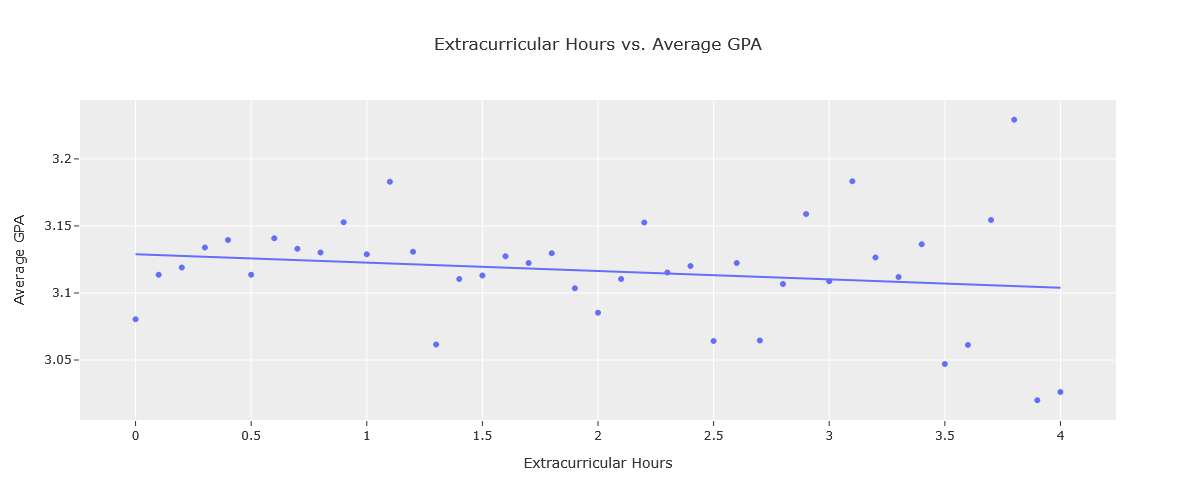

In [46]:
DF_extrain = DF_india.groupby('Extracurricular Hours')['GPA'].mean().reset_index()
DF_extrain

fig_extrain = px.scatter(DF_extrain, x = 'Extracurricular Hours', y = 'GPA',
                  title = 'Extracurricular Hours vs. Average GPA',
                      trendline = 'ols')
fig_extrain.update_layout(bargap=0.02,
                  yaxis_title = 'Average GPA',
                   autosize=False,
                   width=1000,
                   height=500,
                  template="ggplot2"
                       )
fig_extrain.show()

### Although this graph shows a negative correlation between Extracurricular Hours and Average GPA, the correlation is very small and hardly fits. The score of the trendline is 0.03 with a slope of -0.006. That means there is hardly an influence by extracurricular hours on GPA. 

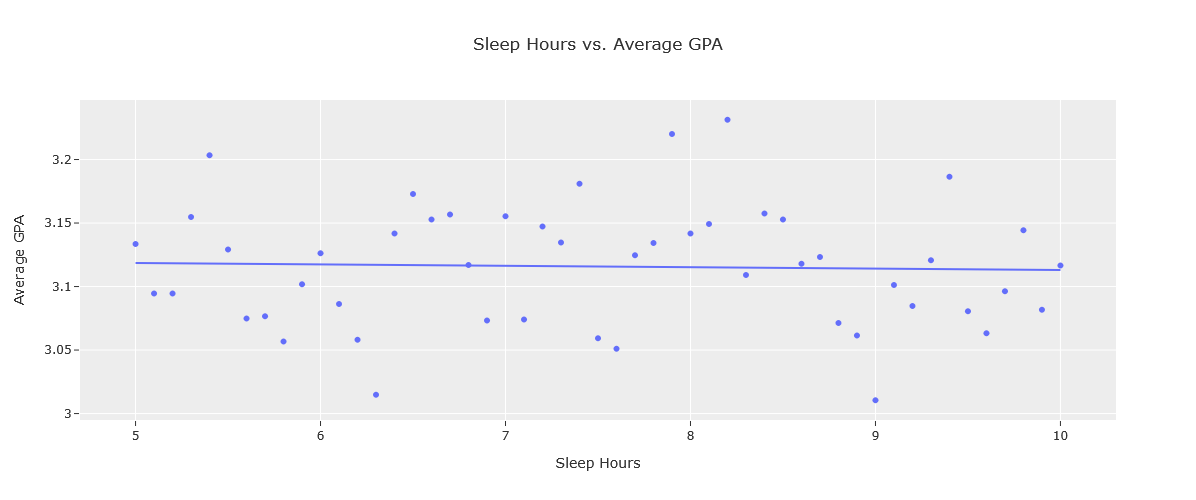

In [47]:
DF_sleepin = DF_india.groupby('Sleep Hours')['GPA'].mean().reset_index()
DF_sleepin

fig_sleepin = px.scatter(DF_sleepin, x = 'Sleep Hours', y = 'GPA',
                  title = 'Sleep Hours vs. Average GPA',
                      trendline = 'ols')
fig_sleepin.update_layout(bargap=0.02,
                  yaxis_title = 'Average GPA',
                   autosize=False,
                   width=1000,
                   height=500,
                  template="ggplot2"
                       )
fig_sleepin.show()

### On first glance of the graph, we could already tell that sleep has little to no effect on GPA, which is surprising. We expected that as one slept less, the less focused one would be on their education. However, this scatter plot does not support that hypothesis. The score of the line is 0.001 and is slightly negative with a slope of -0.001. The trendline shows that there is little to no correlation between sleep and GPA.

### One could say that the ones that some students with higher GPA's often pull all nighters or stay up late a lot.

In [48]:
DF_india

,Student ID,Study Hours,Extracurricular Hours,Sleep Hours,Social Hours,Physical Activity Hours,GPA,Stress Level
0,1,6.9,3.8,8.7,2.8,1.8,2.99,Moderate
1,2,5.3,3.5,8.0,4.2,3.0,2.75,Low
2,3,5.1,3.9,9.2,1.2,4.6,2.67,Low
3,4,6.5,2.1,7.2,1.7,6.5,2.88,Moderate
4,5,8.1,0.6,6.5,2.2,6.6,3.51,High
...,...,...,...,...,...,...,...,...
1995,1996,6.5,0.2,7.4,2.1,7.8,3.32,Moderate
1996,1997,6.3,2.8,8.8,1.5,4.6,2.65,Moderate
1997,1998,6.2,0.0,6.2,0.8,10.8,3.14,Moderate
1998,1999,8.1,0.7,7.6,3.5,4.1,3.04,High


In [49]:
dummy_datain = pd.get_dummies(DF_india, columns = ['Stress Level'],dtype = float)
dummy_datain

,Student ID,Study Hours,Extracurricular Hours,Sleep Hours,Social Hours,Physical Activity Hours,GPA,Stress Level_High,Stress Level_Low,Stress Level_Moderate
0,1,6.9,3.8,8.7,2.8,1.8,2.99,0.0,0.0,1.0
1,2,5.3,3.5,8.0,4.2,3.0,2.75,0.0,1.0,0.0
2,3,5.1,3.9,9.2,1.2,4.6,2.67,0.0,1.0,0.0
3,4,6.5,2.1,7.2,1.7,6.5,2.88,0.0,0.0,1.0
4,5,8.1,0.6,6.5,2.2,6.6,3.51,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1995,1996,6.5,0.2,7.4,2.1,7.8,3.32,0.0,0.0,1.0
1996,1997,6.3,2.8,8.8,1.5,4.6,2.65,0.0,0.0,1.0
1997,1998,6.2,0.0,6.2,0.8,10.8,3.14,0.0,0.0,1.0
1998,1999,8.1,0.7,7.6,3.5,4.1,3.04,1.0,0.0,0.0


In [50]:
Xin = dummy_datain[['Study Hours', 'Extracurricular Hours', 'Social Hours', 'Physical Activity Hours','Stress Level_High','Stress Level_Moderate','Stress Level_Low']].values.reshape(-1,7)
yin = dummy_datain['GPA']

#do the regression
LM_in = LinearRegression()
LM_in.fit(Xin,yin)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [51]:
LM_in.coef_

array([ 0.15767361, -0.00376018,  0.00508544,  0.00365796,  0.0030697 ,
       -0.01273081,  0.00966111])

In [52]:
LM_in.intercept_

np.float64(1.916396408666098)

In [53]:
LM_in.score(X,y)

0.5417504784010405

In [54]:
Rsq =  0.5417504784010405
k = 7
n = len(dummy_datain)
AdjRsq = 1-((1-Rsq)*(n-1)/(n-k-1))

print(AdjRsq)

0.5401401638171084


### Using dummy data and a linear fit, we were able to get a score of a linear fit based on multiple variables and using them to predict GPA. The adjusted R^2 score is 0.5401. The linear fit suggests that using 'Study Hours', 'Extracurricular Hours', 'Social Hours', 'Physical Activity Hours',' Stress Level_High',' Stress Level_Moderate', and 'Stress Level_Low', around 54 percent of the data can be explained by the linear fit. The score is not exactly what we had expected, as we had hypothesized that certain variables, such as studying hours, would cause the score to shift higher.

### Earlier, we saw that study hours had a good correlation with average GPA, but here we see that by including other variables, the score lowers significantly. The slope of study hours for the linear fit here is 0.157, and the one earlier was 0.152. Although they had similar slopes, the new, much lower score, which was around 98 percent earlier, shows how little influence the other variables have in comparison to study hours. However, we also have to take into account how earlier we used AVERAGE GPA, and for our linear fit, we used all GPA points; this could have greatly affected our linear fit. This also suggests that studying hours might have less of an influence on GPA than originally thought.

In [55]:
dummy_datain['Prediction GPA'] = LM_in.predict(Xin)
dummy_datain['Residual of Prediction GPA'] = dummy_datain['GPA']-dummy_datain['Prediction GPA']
dummy_datain

,Student ID,Study Hours,Extracurricular Hours,Sleep Hours,Social Hours,Physical Activity Hours,GPA,Stress Level_High,Stress Level_Low,Stress Level_Moderate,Prediction GPA,Residual of Prediction GPA
0,1,6.9,3.8,8.7,2.8,1.8,2.99,0.0,0.0,1.0,2.998148,-0.008148
1,2,5.3,3.5,8.0,4.2,3.0,2.75,0.0,1.0,0.0,2.780900,-0.030900
2,3,5.1,3.9,9.2,1.2,4.6,2.67,0.0,1.0,0.0,2.738457,-0.068457
3,4,6.5,2.1,7.2,1.7,6.5,2.88,0.0,0.0,1.0,2.953070,-0.073070
4,5,8.1,0.6,6.5,2.2,6.6,3.51,1.0,0.0,0.0,3.229697,0.280303
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,6.5,0.2,7.4,2.1,7.8,3.32,0.0,0.0,1.0,2.967004,0.352996
1996,1997,6.3,2.8,8.8,1.5,4.6,2.65,0.0,0.0,1.0,2.910936,-0.260936
1997,1998,6.2,0.0,6.2,0.8,10.8,3.14,0.0,0.0,1.0,2.924816,0.215184
1998,1999,8.1,0.7,7.6,3.5,4.1,3.04,1.0,0.0,0.0,3.226787,-0.186787


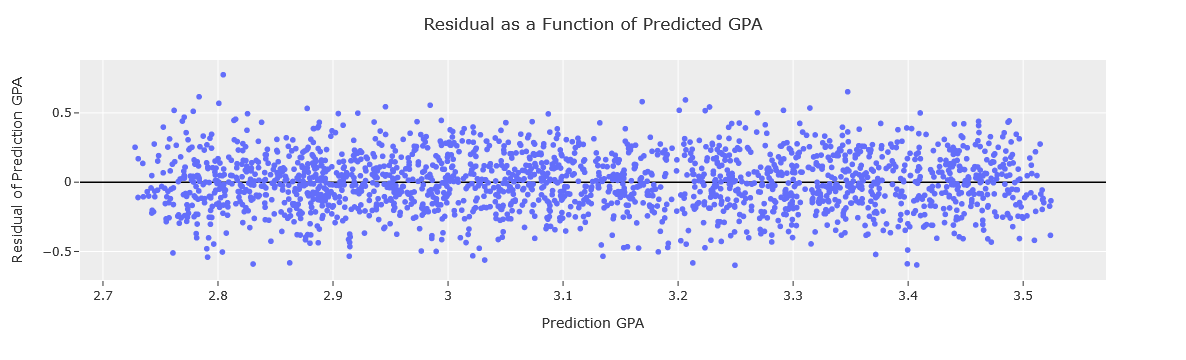

In [56]:
fig_residualin = px.scatter(dummy_datain,x='Prediction GPA',y='Residual of Prediction GPA')

# Update layout to show axis line at y=0
fig_residualin.update_layout(
    yaxis={'zeroline':True, 'zerolinewidth':1.5, 'zerolinecolor':"black"}
)

fig_residualin.update_layout(template="ggplot2",
                  title='Residual as a Function of Predicted GPA',
                  title_x=0.5
                 )

fig_residualin.show()

### Based on the residual graph, a linear fit seems to somewhat support the data which is supported by the R^2 score from above. The data seems to be scattered well on both sides of the line and no obvious patterns are present.

### Overall, based on Study Hours, Extracurricular Hours, Social Hours, Physical Activity Hours, Stress Level, and even Sleep Hours, there seems not to be much correlation between these and GPA. Although earlier we saw that study hours had a great correlation with AVERAGE GPA, we saw that doing a linear fit further shows how much the score lowered. The linear fit could ALSO suggest that average GPA really changes the results in comparison to using every single GPA point.